In [1]:
data_path = "/Users/kaden.cho/git/kadensungbincho/udemy_local/Python-for-Finance-Repo-master/07-Stock-Market-Analysis-Capstone-Project"

In [2]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_datareader
import datetime

In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [6]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)

In [7]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [8]:
ford = web.DataReader('F', 'yahoo', start, end)
gm = web.DataReader('GM', 'yahoo', start, end)

In [9]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.640026
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.719082
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.525387
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.118261
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.055021


In [10]:
# visualization

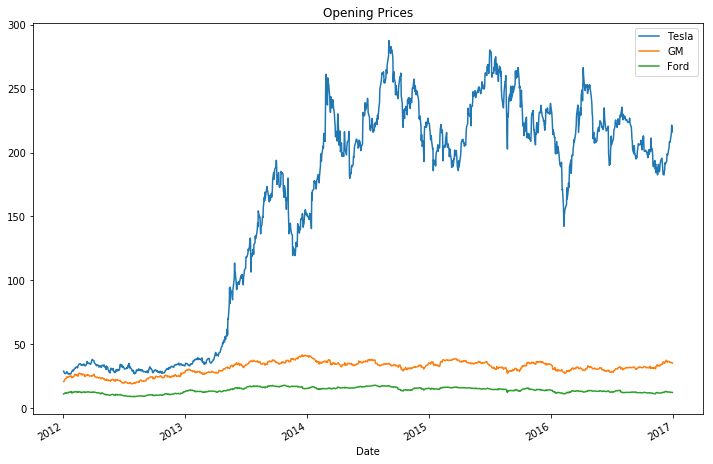

In [11]:
tesla['Open'].plot(label='Tesla', figsize=(12, 8), title="Opening Prices")
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

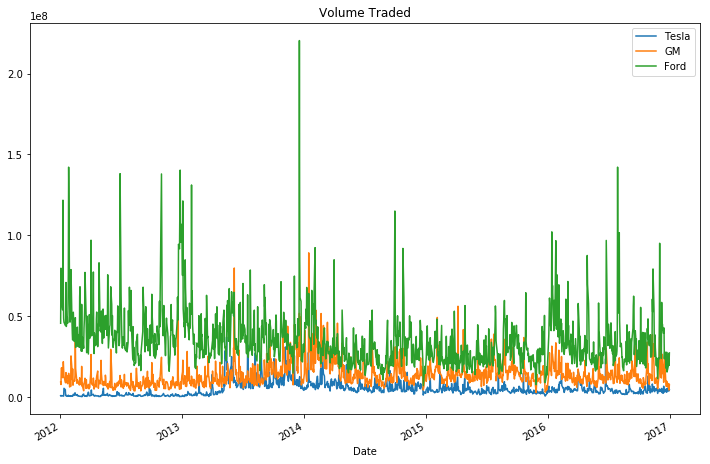

In [12]:
tesla['Volume'].plot(label='Tesla', figsize=(12, 8), title="Volume Traded")
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

In [13]:
ford['Volume'].argmax()

/Users/kaden.cho/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2013-12-18 00:00:00')

In [14]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

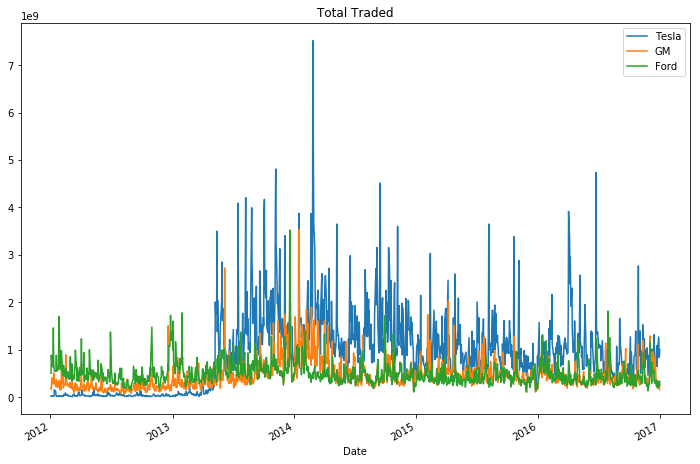

In [15]:
tesla['Total Traded'].plot(label='Tesla', figsize=(12, 8), title="Total Traded")
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()

In [16]:
tesla['Total Traded'].argmax()

/Users/kaden.cho/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2014-02-25 00:00:00')

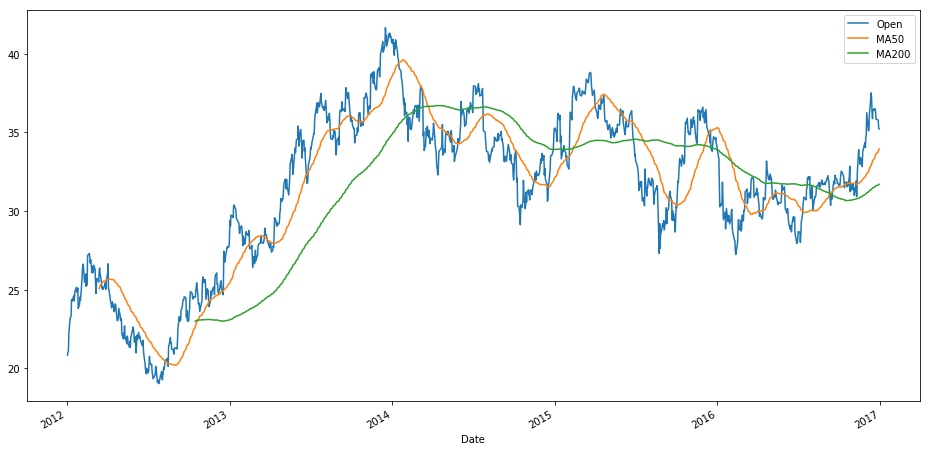

In [18]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16, 8))

In [21]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [22]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)

In [23]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c5587b8>,
      dtype=object)

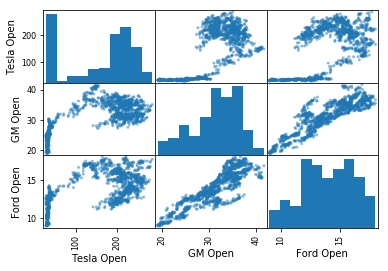

In [24]:
scatter_matrix(car_comp)

In [26]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     - 706kB 67.0MB/s
  Running setup.py install for mpl-finance ... done
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
from mpl_finance import candlestick_ohlc

In [28]:
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [29]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,8.064753,5.028089e+08
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.187930,8.889359e+08
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.398067,7.690521e+08
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.485017,7.025298e+08
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.550230,6.386011e+08


In [32]:
ford_reset = ford.loc['2012-01'].reset_index()

In [34]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [35]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,8.064753,5.028089e+08,734505.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.187930,8.889359e+08,734506.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.398067,7.690521e+08,734507.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.485017,7.025298e+08,734508.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.550230,6.386011e+08,734511.0


In [38]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [39]:
ford_values

[(734505.0, 11.0, 11.25, 10.989999771118164, 11.130000114440918),
 (734506.0,
  11.149999618530273,
  11.529999732971191,
  11.069999694824219,
  11.300000190734863),
 (734507.0,
  11.329999923706055,
  11.630000114440918,
  11.239999771118164,
  11.59000015258789),
 (734508.0,
  11.739999771118164,
  11.800000190734863,
  11.520000457763672,
  11.710000038146973),
 (734511.0,
  11.829999923706055,
  11.949999809265137,
  11.699999809265137,
  11.800000190734863),
 (734512.0, 12.0, 12.050000190734863, 11.630000114440918, 11.800000190734863),
 (734513.0,
  11.739999771118164,
  12.180000305175781,
  11.649999618530273,
  12.069999694824219),
 (734514.0,
  12.15999984741211,
  12.180000305175781,
  11.890000343322754,
  12.140000343322754),
 (734515.0,
  12.010000228881836,
  12.079999923706055,
  11.84000015258789,
  12.039999961853027),
 (734519.0,
  12.199999809265137,
  12.260000228881836,
  11.960000038146973,
  12.020000457763672),
 (734520.0, 12.029999732971191, 12.369999885559082

In [40]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

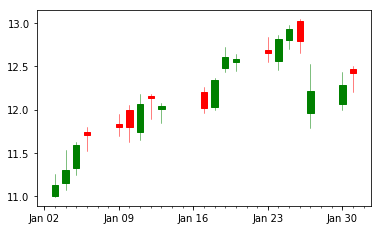

In [44]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, ford_values, width=0.6, colorup='g', colordown='R');